<a href="https://colab.research.google.com/github/massimocipressi/MLPNS_MCipressi/blob/main/Central_limit_theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pylab as pl
import numpy as np
import scipy as sp
#from scipy.optimize import curve.fit, minimize #per minimizzazione
import seaborn #per stile plot
seaborn.set_style("darkgrid")

In [2]:
np.random.seed(10)
mymean = 100

In [3]:
#facciamo con una chi square distribution che ha df = mean
df = mymean

In [4]:
#creiamo un dizionario mi riferisco a dei valori per nome e non per posizione
#inizio creandolo vuoto
mydist = {}

Text(0.5, 0, 'x')

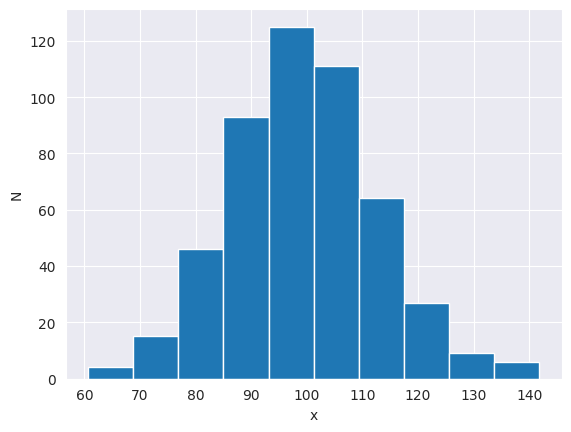

In [5]:
#le distribuzioni ci sono sia in scipy che in numpy
pl.hist(np.random.chisquare(mymean,size=500)) #hist ci dà anche un return value con l'istogramma
pl.ylabel("N")
pl.xlabel("x")

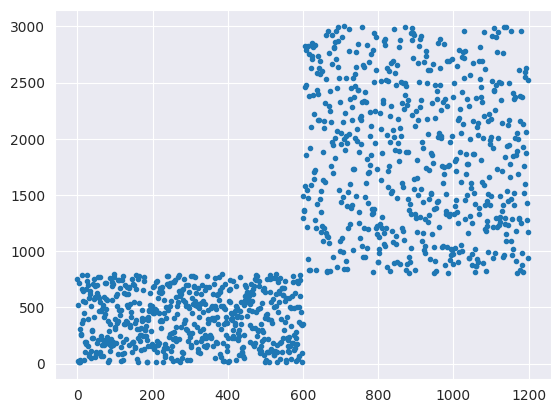

In [6]:
#scegliamo 100 size fra 10 e 2000 (qui facciamo da 0, correggere)
mysize = np.concatenate(((np.random.rand(600)*800).astype(int),(np.random.rand(600)*2200).astype(int)+800)) 
mysize[mysize<10]=10
pl.plot(mysize,'.');

In [7]:
#chisqaure
for s in mysize:
  mydist[s] = np.random.chisquare(mymean,size=s) #così ho tutte le sample e le posso chiamare per nome

In [8]:
np.sqrt?

In [9]:
int(5.2)

5

(96.0, 104.0)

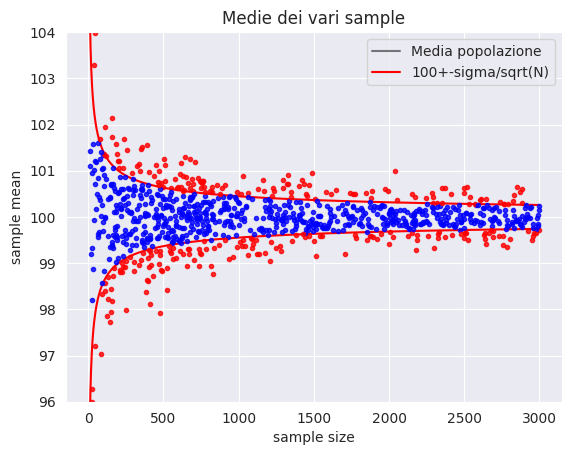

In [10]:
ax=pl.figure().add_subplot(111)

ax.plot(pl.xlim(), [100,100], 'k', alpha = 0.5, label="Media popolazione") #do le y iniz e fin di una linea
ax.set_xlabel("sample size")
ax.set_ylabel("sample mean")
ax.set_title("Medie dei vari sample")

x = np.arange(1,3000)
y1 = 100+np.sqrt(200)/np.sqrt(x)
y2 = 100-np.sqrt(200)/np.sqrt(x)
ax.plot(x,y1,'r')
ax.plot(x,y2,'r',label="100+-sigma/sqrt(N)")

pro = 0

for d in mydist.keys(): #questo fa correre sui numeri del dizionario
  a = mydist[d].mean()
  b = 100+np.sqrt(200)/np.sqrt(d)
  c = 100-np.sqrt(200)/np.sqrt(d)
  if (a<=b)and(a>=c):
    ax.plot(d,a,'b.',alpha=0.8)
    pro+=1
  else:
    ax.plot(d,a,'r.',alpha=0.8)


ax.legend()
ax.set_ylim(96,104)

#dovrei poter vedere che i punti si approcciano alla media
#la varianza su una retta verticale dovrebbe infatti essere proporzionale a 1/sqrt(N)

In [15]:
pro

655

In [11]:
#i punti blu sono quelli che dovrebbero essere entro un sigma, dovrebbero essere il 68% del totale
print(pro/len(mysize))

0.5458333333333333


Text(0, 0.5, 'sample mean')

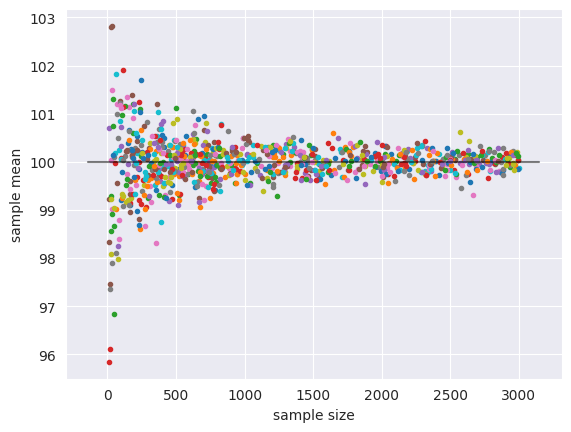

In [12]:
#normal
for s in mysize:
  mydist[s] = np.random.normal(mymean,10,size=s) #così ho tutte le sample e le posso chiamare per nome

ax=pl.figure().add_subplot(111)
for d in mydist.keys(): #questo fa correre sui numeri del dizionario
  ax.plot(d,mydist[d].mean(),'.')

ax.plot(pl.xlim(), [100,100], 'k', alpha = 0.5) #do le y iniz e fin di una linea
ax.set_xlabel("sample size")
ax.set_ylabel("sample mean")

Text(0, 0.5, 'sample mean')

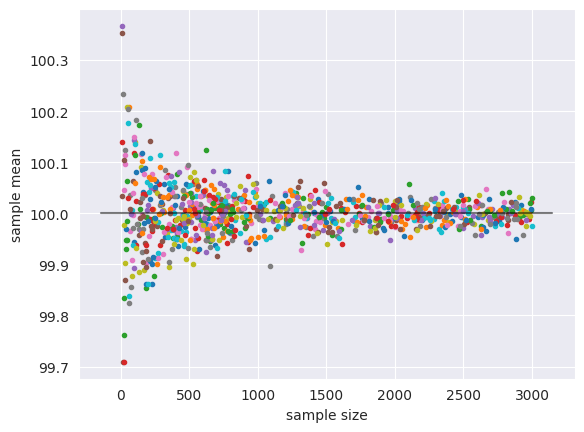

In [13]:
#poisson
for s in mysize:
  mydist[s] = np.random.normal(mymean,size=s) #così ho tutte le sample e le posso chiamare per nome

ax=pl.figure().add_subplot(111)
for d in mydist.keys(): #questo fa correre sui numeri del dizionario
  ax.plot(d,mydist[d].mean(),'.')

ax.plot(pl.xlim(), [100,100], 'k', alpha = 0.5) #do le y iniz e fin di una linea
ax.set_xlabel("sample size")
ax.set_ylabel("sample mean")

Text(0, 0.5, 'sample mean')

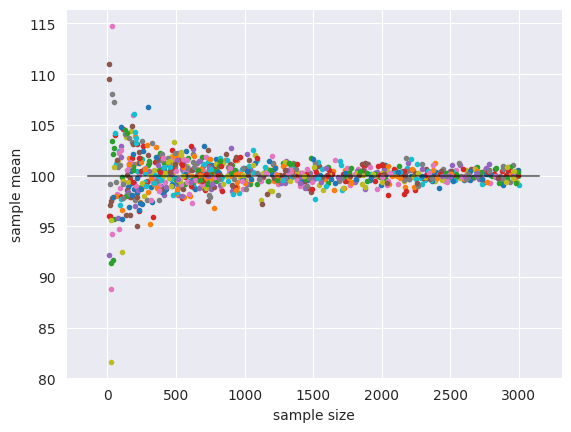

In [14]:
#gamma
for s in mysize:
  mydist[s] = np.random.gamma(10,10,size=s) #così ho tutte le sample e le posso chiamare per nome

ax=pl.figure().add_subplot(111)
for d in mydist.keys(): #questo fa correre sui numeri del dizionario
  ax.plot(d,mydist[d].mean(),'.')

ax.plot(pl.xlim(), [100,100], 'k', alpha = 0.5) #do le y iniz e fin di una linea
ax.set_xlabel("sample size")
ax.set_ylabel("sample mean")